In [2]:
import pandas as pd

In [4]:
oscar_nominated_movies = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BigML_Dataset_5f50a62c2fb31c516d000176.csv")

# Задачи

## 0. Выбрать колонку ...

In [5]:
oscar_nominated_movies.user_reviews

0        318.0
1        361.0
2       1008.0
3        272.0
4       5078.0
         ...  
1178     235.0
1179      94.0
1180      82.0
1181      55.0
1182     178.0
Name: user_reviews, Length: 1183, dtype: float64

## 1. Корреляция между числом отзывов пользователей и критиков

In [7]:
user_reviews = oscar_nominated_movies.user_reviews

In [8]:
critic_reviews = oscar_nominated_movies.critic_reviews

In [9]:
user_reviews.corr(critic_reviews)

0.47332297897274267

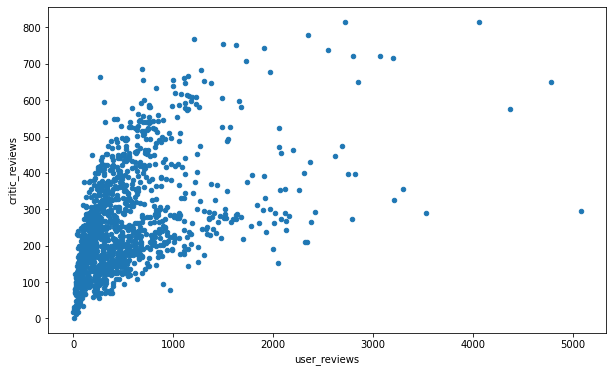

In [10]:
oscar_nominated_movies.plot(x="user_reviews", y="critic_reviews", kind="scatter", figsize=(10,6))

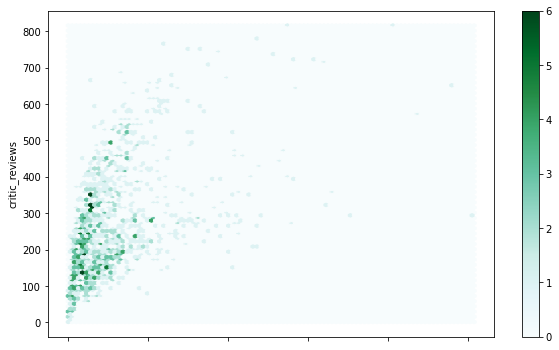

In [11]:
oscar_nominated_movies.plot(x="user_reviews", y="critic_reviews", kind="hexbin", figsize=(10,6))

## 2. Сравнение рейтингов фильмов, номинированных в категории лучший фильм и не номиниривоанных в этой категории

In [12]:
oscar_best_pictures_nominated = oscar_nominated_movies[oscar_nominated_movies.Oscar_Best_Picture_nominated=="Yes"]

In [13]:
oscar_best_pictures_not_nominated = oscar_nominated_movies[oscar_nominated_movies.Oscar_Best_Picture_nominated!="Yes"]

In [14]:
oscar_best_pictures_nominated.rate.mean()

7.803968289603172

In [15]:
oscar_best_pictures_not_nominated.rate.mean()

6.955061493311256

In [16]:
oscar_best_pictures_nominated.rate.median()

7.80000019

In [17]:
oscar_best_pictures_not_nominated.rate.median()

7.099999900000001

In [18]:
oscar_best_pictures_nominated.rate.std()

0.4188366298153497

In [19]:
oscar_best_pictures_not_nominated.rate.std()

0.8162503417465031

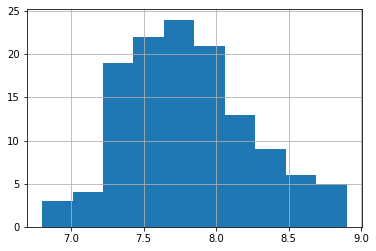

In [20]:
oscar_best_pictures_nominated.rate.hist()

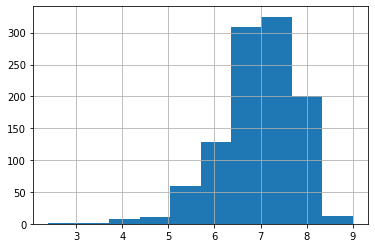

In [21]:
oscar_best_pictures_not_nominated.rate.hist()

In [25]:
def isSymmetricSample(mean, median, std, n):
  from math import sqrt

  return abs(median - mean) <= 3*std/sqrt(n)

In [27]:
median = oscar_best_pictures_nominated.rate.median()
mean = oscar_best_pictures_nominated.rate.mean()
std = oscar_best_pictures_nominated.rate.std()
n = len(oscar_best_pictures_nominated.rate)

print(isSymmetricSample(median, mean, std, n))

True


In [28]:
median = oscar_best_pictures_not_nominated.rate.median()
mean = oscar_best_pictures_not_nominated.rate.mean()
std = oscar_best_pictures_not_nominated.rate.std()
n = len(oscar_best_pictures_not_nominated.rate)

print(isSymmetricSample(median, mean, std, n))

False


## 3. Название фильмов с самым высоким и самым низким рейтингом

In [29]:
sorted = oscar_nominated_movies.sort_values("rate", ascending=False)

In [30]:
sorted.head(1)["movie"]

533    The Dark Knight
Name: movie, dtype: object

In [31]:
sorted.tail(1)["movie"]

57    Battlefield Earth
Name: movie, dtype: object

## 4. Найти все фильмы жанра драма

In [32]:
oscar_nominated_movies.genre.str.find("Drama")

0       -1
1       -1
2       -1
3       10
4       10
        ..
1178     0
1179     0
1180    10
1181     6
1182    10
Name: genre, Length: 1183, dtype: int64

In [33]:
oscar_nominated_movies.movie[oscar_nominated_movies.genre.str.find("Drama") > -1]

3                                                   Frida
4       The Lord of the Rings: The Fellowship of the Ring
9                                            Corpse Bride
16                                           Training Day
18                                        American Psycho
                              ...                        
1178                                 Call Me by Your Name
1179                                       Phantom Thread
1180                                     Victoria & Abdul
1181                                Roman J. Israel, Esq.
1182                                             The Post
Name: movie, Length: 667, dtype: object

In [34]:
(oscar_nominated_movies.genre.str.find("Drama") > -1).astype(int)

0       0
1       0
2       0
3       1
4       1
       ..
1178    1
1179    1
1180    1
1181    1
1182    1
Name: genre, Length: 1183, dtype: int64

In [35]:
oscar_nominated_movies["Drama"] = (oscar_nominated_movies.genre.str.find("Drama") > -1).astype(int)

In [36]:
oscar_nominated_movies.Drama

0       0
1       0
2       0
3       1
4       1
       ..
1178    1
1179    1
1180    1
1181    1
1182    1
Name: Drama, Length: 1183, dtype: int64

In [37]:
oscar_nominated_movies.certificate.unique()

array(['PG-13', 'G', 'R', 'PG', 'Not Rated', 'Unrated', nan, 'TV-MA'],
      dtype=object)

## 5. Средний рейтинг по возрастному рейтингу

In [38]:
oscar_nominated_movies.groupby("certificate").head()

,year,movie,movie_id,certificate,duration,genre,rate,metascore,synopsis,votes,gross,release_date,user_reviews,critic_reviews,popularity,awards_wins,awards_nominations,Oscar_Best_Picture_won,Oscar_Best_Picture_nominated,Oscar_Best_Director_won,Oscar_Best_Director_nominated,Oscar_Best_Actor_won,Oscar_Best_Actor_nominated,Oscar_Best_Actress_won,Oscar_Best_Actress_nominated,Oscar_Best_Supporting_Actor_won,Oscar_Best_Supporting_Actor_nominated,Oscar_Best_Supporting_Actress_won,Oscar_Best_Supporting_Actress_nominated,Oscar_Best_AdaScreen_won,Oscar_Best_AdaScreen_nominated,Oscar_Best_OriScreen_won,Oscar_Best_OriScreen_nominated,Oscar_nominated,Oscar_nominated_categories,Golden_Globes_won,Golden_Globes_won_categories,Golden_Globes_nominated,Golden_Globes_nominated_categories,BAFTA_won,...,People_Choice_won_categories,People_Choice_nominated,People_Choice_nominated_categories,London_Critics_Circle_Film_won,London_Critics_Circle_Film_won_categories,London_Critics_Circle_Film_nominated,London_Critics_Circle_Film_nominated_categories,American_Cinema_Editors_won,American_Cinema_Editors_won_categories,American_Cinema_Editors_nominated,American_Cinema_Editors_nominated_categories,Hollywood_Film_won,Hollywood_Film_won_categories,Hollywood_Film_nominated,Hollywood_Film_nominated_categories,Austin_Film_Critics_Association_won,Austin_Film_Critics_Association_won_categories,Austin_Film_Critics_Association_nominated,Austin_Film_Critics_Association_nominated_categories,Denver_Film_Critics_Society_won,Denver_Film_Critics_Society_won_categories,Denver_Film_Critics_Society_nominated,Denver_Film_Critics_Society_nominated_categories,Boston_Society_of_Film_Critics_won,Boston_Society_of_Film_Critics_won_categories,Boston_Society_of_Film_Critics_nominated,Boston_Society_of_Film_Critics_nominated_categories,New_York_Film_Critics_Circle_won,New_York_Film_Critics_Circle_won_categories,New_York_Film_Critics_Circle_nominated,New_York_Film_Critics_Circle_nominated_categories,Los_Angeles_Film_Critics_Association_won,Los_Angeles_Film_Critics_Association_won_categories,Los_Angeles_Film_Critics_Association_nominated,Los_Angeles_Film_Critics_Association_nominated_categories,release_date.year,release_date.month,release_date.day-of-month,release_date.day-of-week,Drama
0,2001,Kate & Leopold,tt0035423,PG-13,118,Comedy|Fantasy|Romance,6.4,44.0,An English Duke from 1876 is inadvertedly drag...,66660,47100000.0,2001-12-25,318.0,125.0,2363.0,1,4,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,1,"Best Music, Original Song",1,Best Original Song - Motion Picture,2,Best Original Song - Motion Picture|Best Perfo...,0,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,2001.0,12.0,25.0,2.0,0
1,2000,Chicken Run,tt0120630,G,84,Animation|Adventure|Comedy,7.0,88.0,When a cockerel apparently flies into a chicke...,144475,106790000.0,2000-06-23,361.0,186.0,2859.0,5,11,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,NaN,0,NaN,1,Best Motion Picture - Comedy or Musical,0,...,NaN,0,NaN,0,NaN,2,British Film of the Year|British Producer of t...,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,1,Best Animated Film,1,Best Animated Film,1,Best Animation,1,Best Animation,2000.0,6.0,23.0,5.0,0
2,2005,Fantastic Four,tt0120667,PG-13,106,Action|Adventure|Family,5.7,40.0,A group of astronauts gain superpowers after a...,273203,154700000.0,2005-07-08,1008.0,278.0,1876.0,0,0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,NaN,0,NaN,0,NaN,0,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,2005.0,7.0,8.0,5.0,0
3,2002,Frida,tt0120679,R,123,Biography|Drama|Romance,7.4,61.0,"A biography of artist Frida Kahlo, who channel...",63852,25780000.0,2002-11-22,272.0,126.0,2508.0,2,12,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,6,"Best Music, Original Score|Best Makeup|Best Pe...",1,Best Original Score - Motion Picture,2,Best Original Score - Motion Picture|Best Perf...,1,...,NaN,

In [39]:
oscar_nominated_movies.groupby("certificate").aggregate({"rate": "mean"})

,rate
certificate,
G,7.145000
Not Rated,7.400000
PG,6.956923
PG-13,6.912270
R,7.176893
TV-MA,7.800000
Unrated,6.775000


In [40]:
oscar_nominated_movies.groupby("certificate").aggregate({"rate": "mean"})\
  .rename(columns={"rate": "mean"})

,mean
certificate,
G,7.145000
Not Rated,7.400000
PG,6.956923
PG-13,6.912270
R,7.176893
TV-MA,7.800000
Unrated,6.775000
